In [167]:
import pandas as pd
import numpy as np

In [168]:
document = ['The session started yesterday',
           'It was a NLP Session in Inceptez',
           'In the Session, the mentees are very very curious to learn',
           'The weather is hot',
           'It will rain tommorow after the hot week ',
           'The food is delicious',
           'Do have good food to be healthy',
           'India is entering election on this year',
           'Mentor is connecting from outside to join the session',
           'Russia is in war with ukraine',
           'Dubai is hottest of hottest country ',
           'Sri Lanka is in economic crisis']

In [169]:
document

['The session started yesterday',
 'It was a NLP Session in Inceptez',
 'In the Session, the mentees are very very curious to learn',
 'The weather is hot',
 'It will rain tommorow after the hot week ',
 'The food is delicious',
 'Do have good food to be healthy',
 'India is entering election on this year',
 'Mentor is connecting from outside to join the session',
 'Russia is in war with ukraine',
 'Dubai is hottest of hottest country ',
 'Sri Lanka is in economic crisis']

In [170]:
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(document)
norm_corpus

array(['session started yesterday', 'nlp session inceptez',
       'session mentees curious learn', 'weather hot',
       'rain tommorow hot week', 'food delicious', 'good food healthy',
       'india entering election year',
       'mentor connecting outside join session', 'russia war ukraine',
       'dubai hottest hottest country', 'sri lanka economic crisis'],
      dtype='<U38')

In [70]:
tokenized_corpus

[['session', 'started', 'yesterday'],
 ['nlp', 'session', 'inceptez'],
 ['session', 'mentees', 'curious', 'learn'],
 ['weather', 'hot'],
 ['rain', 'tommorow', 'hot', 'week'],
 ['food', 'delicious'],
 ['good', 'food', 'healthy'],
 ['india', 'entering', 'election', 'year'],
 ['mentor', 'connecting', 'outside', 'join', 'session'],
 ['russia', 'war', 'ukraine'],
 ['dubai', 'hottest', 'hottest', 'country'],
 ['sri', 'lanka', 'economic', 'crisis']]

In [110]:
import nltk
from gensim.models import word2vec
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        self.epoch += 1
        
tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 2   # Word vector dimensionality  
window_context = 3  # Context window size                                                                                                          

w2v_model = word2vec.Word2Vec(sentences = tokenized_corpus, vector_size=feature_size,
                              window=window_context, min_count = min_word_count,
                            epochs=5000,compute_loss = True, callbacks=[callback()])


Loss after epoch 0: 45.845340728759766
Loss after epoch 1: 86.79667663574219
Loss after epoch 2: 140.50897216796875
Loss after epoch 3: 169.4228057861328
Loss after epoch 4: 210.4470977783203
Loss after epoch 5: 231.6035614013672
Loss after epoch 6: 265.49676513671875
Loss after epoch 7: 318.4740905761719
Loss after epoch 8: 356.5869140625
Loss after epoch 9: 411.7164306640625
Loss after epoch 10: 462.5234069824219
Loss after epoch 11: 483.6803283691406
Loss after epoch 12: 510.48516845703125
Loss after epoch 13: 551.429931640625
Loss after epoch 14: 585.352783203125
Loss after epoch 15: 626.3339233398438
Loss after epoch 16: 659.4907836914062
Loss after epoch 17: 679.2363891601562
Loss after epoch 18: 717.3540649414062
Loss after epoch 19: 754.110107421875
Loss after epoch 20: 800.0466918945312
Loss after epoch 21: 821.2026977539062
Loss after epoch 22: 849.4107055664062
Loss after epoch 23: 886.853759765625
Loss after epoch 24: 915.8341674804688
Loss after epoch 25: 956.766357421875


In [111]:
len(w2v_model.wv['lanka'])

2

In [112]:
w2v_model.wv['lanka']

array([-1.326538 ,  1.1050571], dtype=float32)

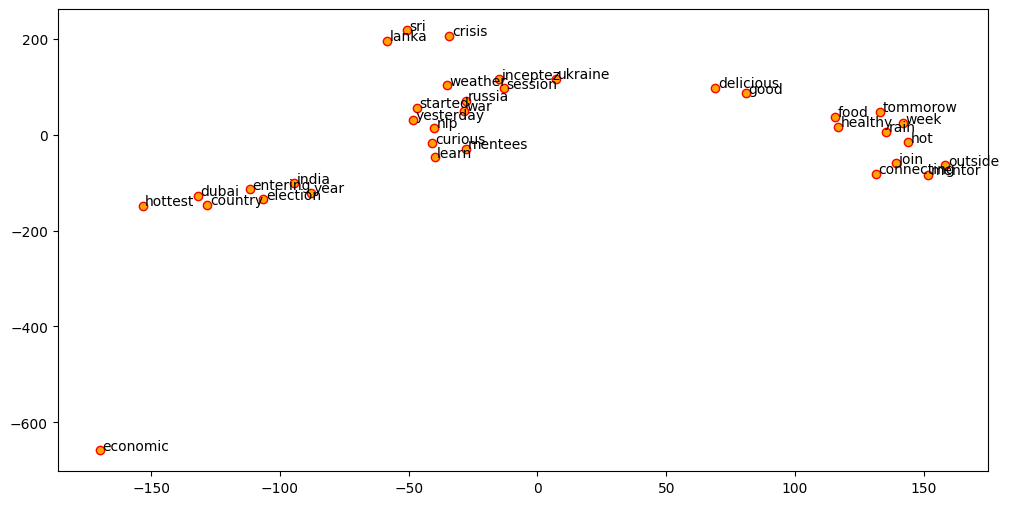

In [117]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [123]:
tokenized_corpus

[['session', 'started', 'yesterday'],
 ['nlp', 'session', 'inceptez'],
 ['session', 'mentees', 'curious', 'learn'],
 ['weather', 'hot'],
 ['rain', 'tommorow', 'hot', 'week'],
 ['food', 'delicious'],
 ['good', 'food', 'healthy'],
 ['india', 'entering', 'election', 'year'],
 ['mentor', 'connecting', 'outside', 'join', 'session'],
 ['russia', 'war', 'ukraine'],
 ['dubai', 'hottest', 'hottest', 'country'],
 ['sri', 'lanka', 'economic', 'crisis']]

In [138]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 5  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, vector_size = feature_size,
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, epochs=5000)
ft_model

In [146]:
ft_model.wv['th']

array([ 0.00666465,  0.0241246 ,  0.022143  ,  0.00674962,  0.03443823,
       -0.01735621,  0.00724824, -0.00497558, -0.02518554,  0.01512193,
       -0.02291822,  0.01759957, -0.01492174, -0.01222419, -0.00062236],
      dtype=float32)

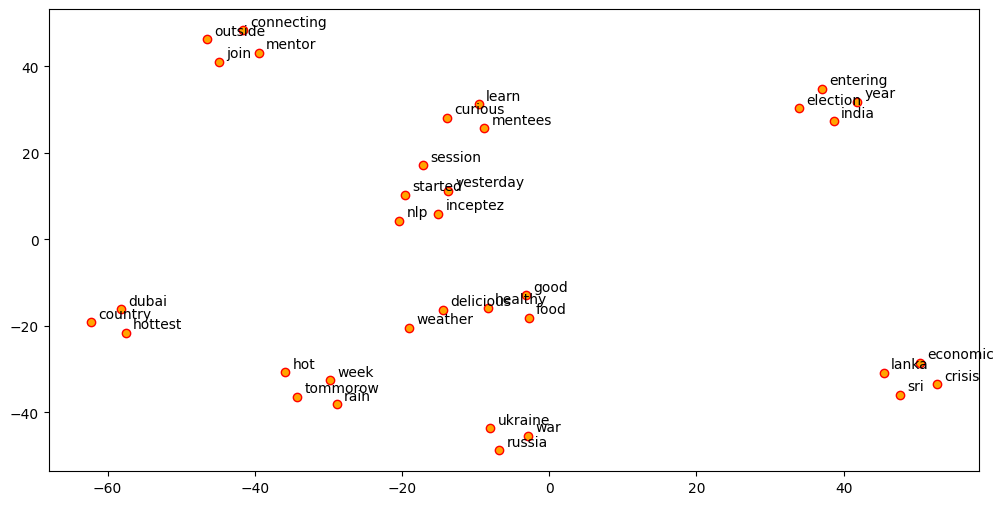

In [147]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index_to_key
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [150]:
# Load GloVe embeddings into a dictionary
def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings_path = 'glove.6B.300d.txt'  # Adjust the path to your downloaded GloVe file
glove_embeddings = load_embeddings(glove_embeddings_path)

In [154]:
len(glove_embeddings['session'])

300

In [ ]:
glove_embeddings['session']

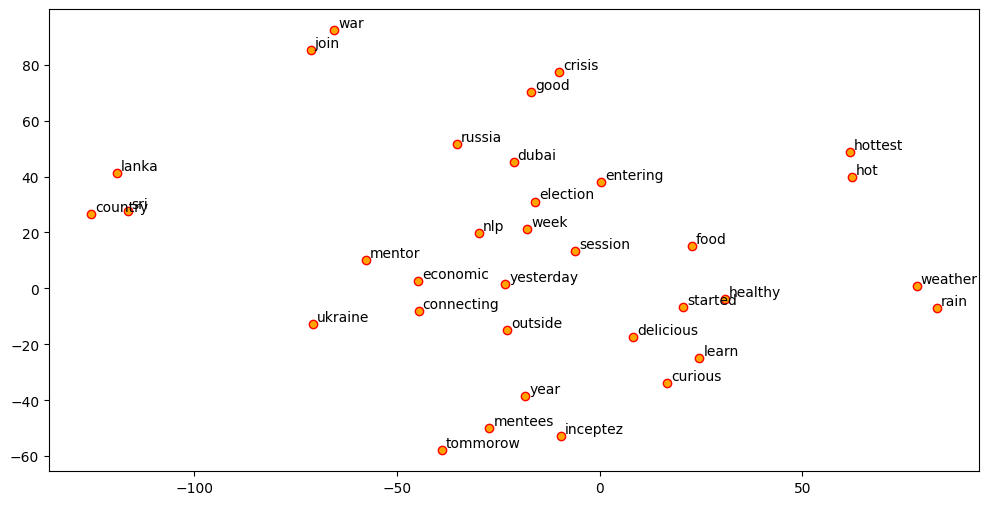

In [163]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index_to_key
wvs = []
for i in words:
    try:
        wvs.append(glove_embeddings[i])
    except:
        continue

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(np.array(wvs))
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [166]:
import numpy as np

# Accessing word embeddings
word = 'example'
if word in glove_embeddings:
    embedding = glove_embeddings[word]
    print(f"Embedding for '{word}': {embedding}")
else:
    print(f"'{word}' not found in embeddings")

# Finding similarity between word embeddings
from scipy.spatial.distance import cosine

word1 = 'hot'
word2 = 'weather'
similarity = 1 - cosine(glove_embeddings[word1], glove_embeddings[word2])
print(f"Similarity between '{word1}' and '{word2}': {similarity}")

Embedding for 'example': [-0.20297    0.010222   0.063166  -0.23259    0.063991   0.13313
 -0.12547   -0.12964   -0.2553    -1.7295     0.091936   0.021622
 -0.31398    0.011587   0.2258    -0.15155   -0.081282  -0.22776
  0.0030483 -0.2752     0.010934   0.05136    0.22624    0.43196
  0.012415  -0.25724   -0.093916  -0.10665   -0.071235  -0.10342
 -0.098095   0.48373   -0.67475   -0.10943   -0.50882   -0.05844
  0.15398   -0.17816   -0.39477    0.066937   0.041519  -0.085288
 -0.21029    0.2462    -0.37551   -0.22549   -0.082648   0.37232
 -0.14809    0.0786     0.11278   -0.10294    0.37601    0.15898
 -0.17571   -0.063246  -0.08103   -0.10676    0.094943   0.28391
  0.35478    0.10635    0.51442   -0.10787   -0.14091   -0.087904
 -0.15251    0.1862     0.14508    0.28751   -0.36265   -0.054447
  0.083526   0.015638  -0.38204   -0.10227   -0.022685   0.24539
 -0.14744   -0.13984   -0.29816   -0.079155  -0.042634  -0.20823
  0.32099    0.11908   -0.10361    0.36009   -0.097773  -0.09